<a href="https://colab.research.google.com/github/Malakismail/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [11]:
cancer = datasets.load_breast_cancer()
cancer


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [12]:
cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


# EDA

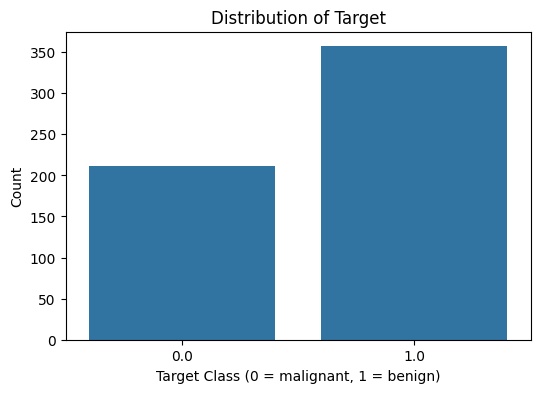

In [13]:
# Visualize distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=cancer)
plt.title("Distribution of Target")
plt.xlabel("Target Class (0 = malignant, 1 = benign)")
plt.ylabel("Count")
plt.show()

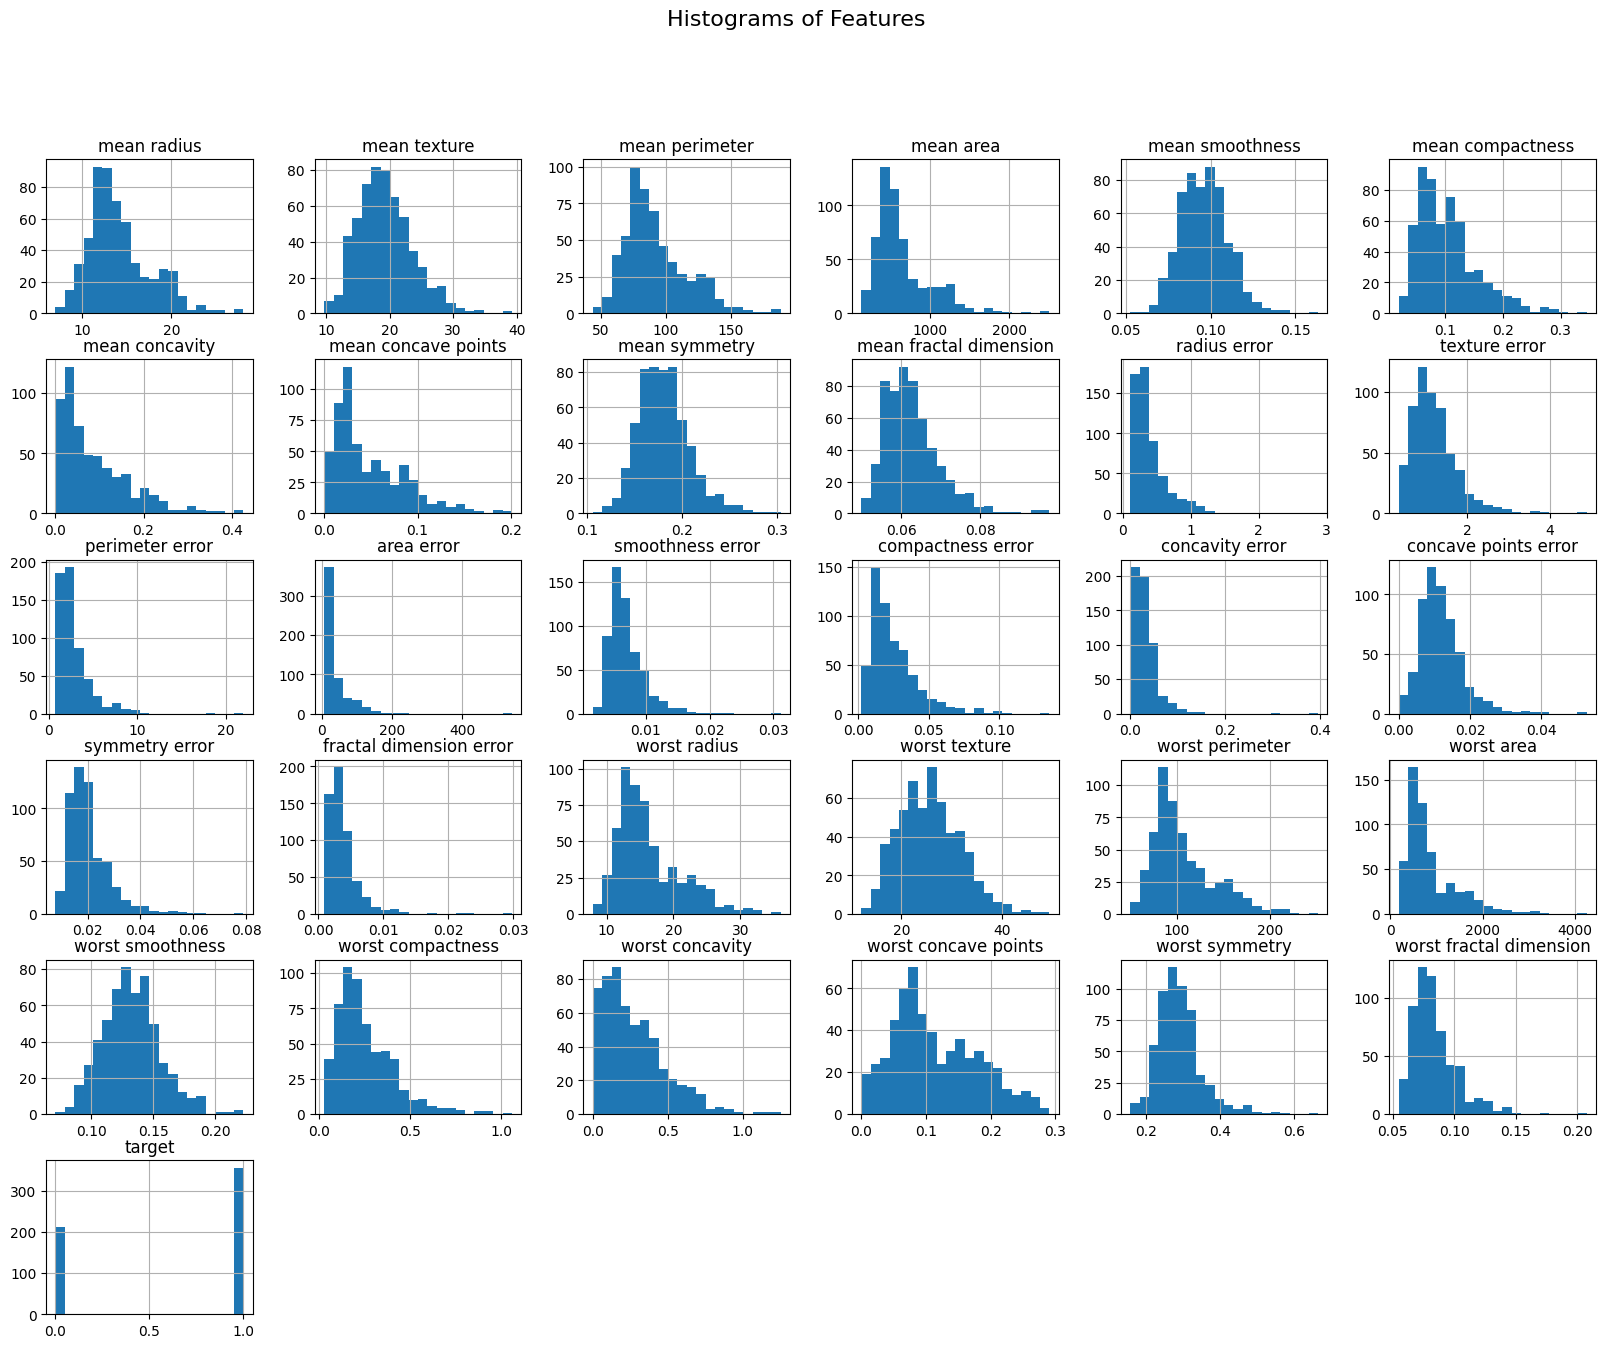

In [14]:
# Histograms for all features
cancer.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

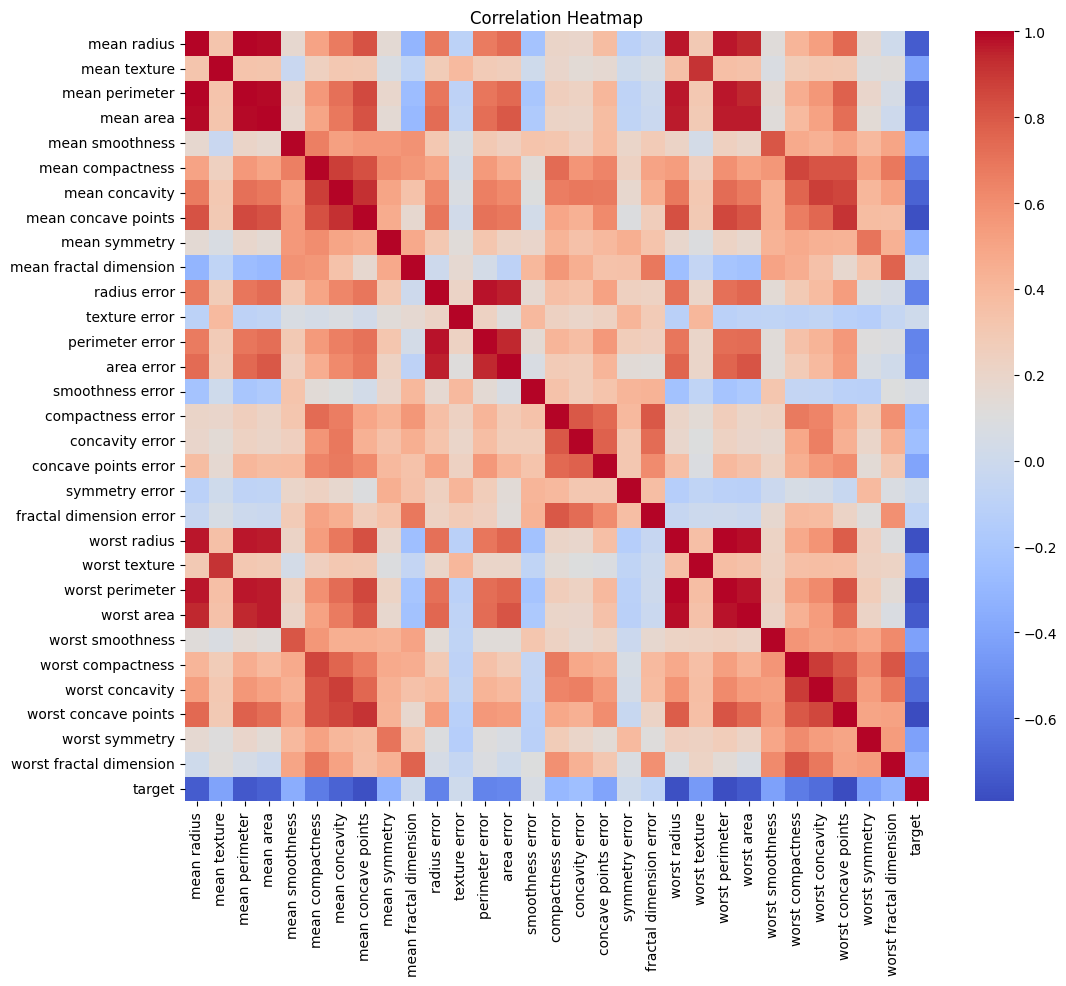

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cancer.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [16]:
cancer.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [17]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
x = cancer.drop(['target'], axis=1)
y = cancer['target']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [20]:
# Standardize the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Support Vector Machine

In [21]:
model_1 = SVC(kernel='linear', random_state=42)
model_1.fit(x_train, y_train)

# Evaluate Model
y_pred_linear = model_1.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\n Accuracy:", accuracy_score(y_test, y_pred_linear))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[41  2]
 [ 3 68]]

 Accuracy: 0.956140350877193


In [22]:
model_2 = SVC(kernel='poly', random_state=42)
model_2.fit(x_train, y_train)

# Evaluate Model
y_pred_poly = model_2.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\n Accuracy:", accuracy_score(y_test, y_pred_poly))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        43
         1.0       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


Confusion Matrix:
 [[28 15]
 [ 0 71]]

 Accuracy: 0.868421052631579


In [23]:
model_3 = SVC(kernel='sigmoid', random_state=42)
model_3.fit(x_train, y_train)

# Evaluate Model
y_pred_sig = model_3.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred_sig))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_sig))
print("\n Accuracy:", accuracy_score(y_test, y_pred_sig))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        43
         1.0       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[39  4]
 [ 1 70]]

 Accuracy: 0.956140350877193


In [24]:
model_4 = SVC(kernel='rbf', random_state=42)
model_4.fit(x_train, y_train)

# Evaluate Model
y_pred_gau = model_4.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred_gau))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gau))
print("\n Accuracy:", accuracy_score(y_test, y_pred_gau))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[41  2]
 [ 0 71]]

 Accuracy: 0.9824561403508771


# Logistic Regression

In [25]:
# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(x_train, y_train)
y_pred_log_reg = log_reg_model.predict(x_test)

# Evaluate models
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\n Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]

 Accuracy: 0.9736842105263158


In [26]:
feature_names = list(cancer.columns[:-1])

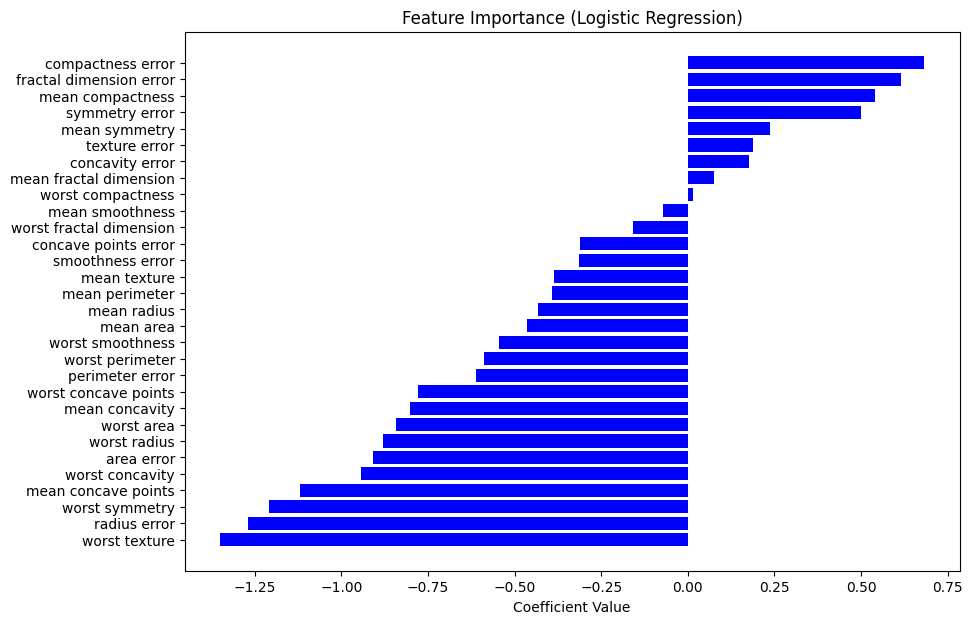

In [27]:
coef = log_reg_model.coef_[0]
sorted_idx = np.argsort(coef)
plt.figure(figsize=(10, 7))
plt.barh(np.array(feature_names)[sorted_idx], coef[sorted_idx], color="blue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()


# Compare Models

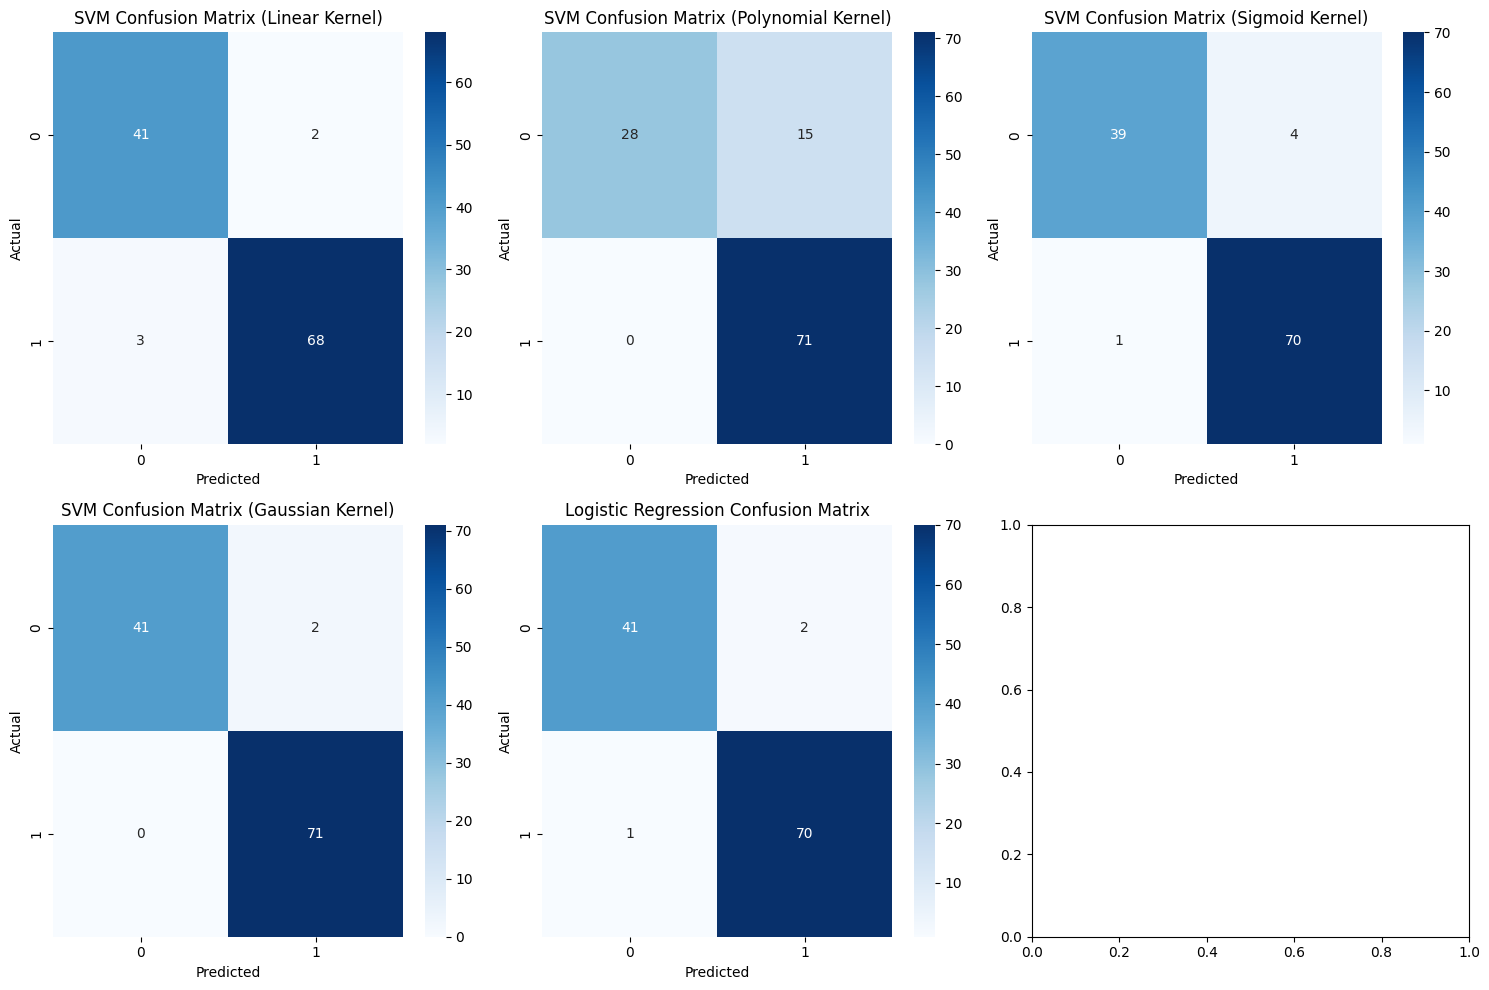

In [28]:
# Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots

# Define titles and predictions for easy iteration
titles = [
    "SVM Confusion Matrix (Linear Kernel)",
    "SVM Confusion Matrix (Polynomial Kernel)",
    "SVM Confusion Matrix (Sigmoid Kernel)",
    "SVM Confusion Matrix (Gaussian Kernel)",
    "Logistic Regression Confusion Matrix"
]

predictions = [y_pred_linear, y_pred_poly, y_pred_sig, y_pred_gau, y_pred_log_reg]

# Loop through subplots and populate them
for ax, title, pred in zip(axes.flatten(), titles, predictions):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


In [29]:
# Create a dictionary of your trained models
models = {
    "SVM (Linear Kernel)": model_1,
    "SVM (Polynomial Kernel)": model_2,
    "SVM (Sigmoid Kernel)": model_3,
    "SVM (Gaussian Kernel)": model_4,
    "Logistic Regression": log_reg_model
}

In [33]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "SVM (Linear Kernel)": SVC(kernel='linear'),
        "SVM (Polynomial Kernel)": SVC(kernel='poly', degree=3),
        "SVM (Sigmoid Kernel)": SVC(kernel='sigmoid'),
        "SVM (RBF Kernel)": SVC(kernel='rbf'),  # Gaussian Kernel
        "Logistic Regression": LogisticRegression(max_iter=1000)
    }

    results = []

    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Training Time (s)": training_time
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

    # Print the results
    print(results_df)

    return results_df

# Call the function
results_df = evaluate_models(x_train, x_test, y_train, y_test)

                     Model  Accuracy  Precision    Recall  F1-Score  \
3         SVM (RBF Kernel)  0.982456   0.972603  1.000000  0.986111   
4      Logistic Regression  0.973684   0.972222  0.985915  0.979021   
2     SVM (Sigmoid Kernel)  0.956140   0.945946  0.985915  0.965517   
0      SVM (Linear Kernel)  0.956140   0.971429  0.957746  0.964539   
1  SVM (Polynomial Kernel)  0.868421   0.825581  1.000000  0.904459   

   Training Time (s)  
3           0.007307  
4           0.017598  
2           0.007049  
0           0.006606  
1           0.008224  
